In [1]:
### Load PPS model
%run ./PPS_model.ipynb

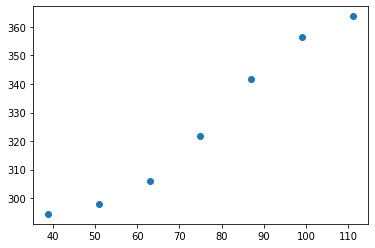

In [2]:
### Audio-tactile experiment simulation setup

## Calculate distance in cms. Speaker is positioned at 100cm from the hand.
s_distances = np.asarray([2700, 2200, 1500, 800, 300]) / 1000
ts = np.linspace(s_distances[0], s_distances[-1], 7)
v = 30  # cm/s
a_distances = 120 - ts * v  # distance points in cm (network coordinates)

## Simulation setup
simtime = 100  # ms

# Experimental Data
ymin = 292.67682496787893
ymax = 368.14828117144293
cp = 120 - 1.329 * v
slope = 1 / 0.09
HC_RTs = RTsig(a_distances, cp, slope)
plt.scatter(a_distances, HC_RTs)

In [85]:
def boundaryhcmodelrun(theta):
    hcRTs, ZMs, ZTs, ZAs = experimentrun(
        a_distances, simtime, theta[0], theta[1], theta[2], theta[3]
    )
    xf = hcRTs
    yf = HC_RTs

    m = (xf.size * np.sum(xf * yf) - np.sum(xf) * np.sum(yf)) / (
        xf.size * np.sum(xf * xf) - np.sum(xf) ** 2
    )
    bias = (np.sum(yf) - m * np.sum(xf)) / xf.size

    if bias < 0:
        bias = 0
    if m < 0:
        m = 0

    cost = np.sum(np.square(np.divide(yf - (m * xf + bias), yf)))

    return cost * 100000


bounds = [(1, 50), (500, 1000), (20, 80), (0.25, 1)]
boundaryhcres = differential_evolution(boundaryhcmodelrun, bounds, disp=True)

differential_evolution step 1: f(x)= 12.7544
differential_evolution step 2: f(x)= 12.7544
differential_evolution step 3: f(x)= 6.68185
differential_evolution step 4: f(x)= 4.40456
differential_evolution step 5: f(x)= 4.1573
differential_evolution step 6: f(x)= 1.37207
differential_evolution step 7: f(x)= 1.37207
differential_evolution step 8: f(x)= 1.37207
differential_evolution step 9: f(x)= 1.37207
differential_evolution step 10: f(x)= 1.37207
differential_evolution step 11: f(x)= 1.37207
differential_evolution step 12: f(x)= 1.37207
differential_evolution step 13: f(x)= 1.37207
differential_evolution step 14: f(x)= 1.37207
differential_evolution step 15: f(x)= 1.37207
differential_evolution step 16: f(x)= 1.37207
differential_evolution step 17: f(x)= 1.37207
differential_evolution step 18: f(x)= 1.37207
differential_evolution step 19: f(x)= 1.37207
differential_evolution step 20: f(x)= 1.37207
differential_evolution step 21: f(x)= 1.37207
differential_evolution step 22: f(x)= 1.0313

In [86]:
print(boundaryhcres)

     fun: 1.0287310554579443
 message: 'Optimization terminated successfully.'
    nfev: 5825
     nit: 96
 success: True
       x: array([1.67047305e+01, 9.82951020e+02, 4.86791243e+01, 9.82802685e-01])


In [3]:
hcRTs, ZMs, ZTs, ZAs = experimentrun(
    a_distances, simtime, 1.67047305e01, 9.82951020e02, 4.86791243e01, 9.82802685e-01
)

2.731234267507431 137.62949745342593


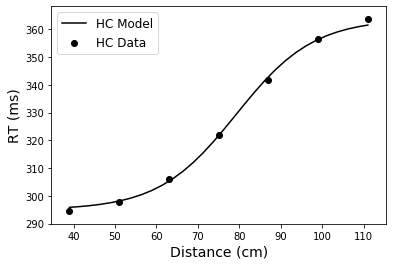

In [4]:
xf = hcRTs
yf = HC_RTs
m = (xf.size * np.sum(xf * yf) - np.sum(xf) * np.sum(yf)) / (
    xf.size * np.sum(xf * xf) - np.sum(xf) ** 2
)
bias = (np.sum(yf) - m * np.sum(xf)) / xf.size

ymin, ymax = np.min(m * xf + bias), np.max(m * xf + bias)
dc, h = sigfit(a_distances, m * xf + bias)
a_distances_exp = np.linspace(a_distances[0], a_distances[-1], 30)
yf_exp = RTsig(a_distances_exp, dc, h)

plt.figure(1)
plt.plot(a_distances_exp, yf_exp, label="HC Model", color="k")
plt.scatter(a_distances, yf, label="HC Data", color="k")
plt.ylabel("RT (ms)", size=14)
plt.xlabel("Distance (cm)", size=14)
plt.legend(prop={"size": 12})
plt.savefig("Results/hc_fitting.png", bbox_inches="tight")
print(m, bias)

In [5]:
sczbaseline = np.asarray([yf_exp, yf])
np.save("hc.npy", sczbaseline)

In [6]:
from sklearn import metrics

print(metrics.mean_squared_error(yf, m * xf + bias, squared=False))

0.37398505631152473


In [7]:
def adjrmse(model, data, k):
    sse = np.sum(np.square(data - model))
    n = len(model)
    return np.sqrt(sse / (n - k))


hc_error = adjrmse(m * xf + bias, sczbaseline[1], 4)
print(hc_error)

0.5712716097766282
